In [ ]:
import sys
sys.path.append('../')
import torch
import torchvision.transforms as transforms
from dataloaderNoob import VOC
from dataloader_sample import DataLoader
import numpy as np

In [ ]:
num_classes = 1
def detection_collate_test(batch):
    r"""Puts each data field into a tensor with outer dimension batch size"""
    targets = []
    imgs = []
    sizes = []
    for sample in batch:
        imgs.append(sample[0])
        #sizes.append(sample[2])
        
        np_label = np.zeros((7,7,6), dtype=np.float32)
        for i in range(7):
            for j in range(7):
                np_label[i][j][1] = (num_classes-1)
        print(len(sample[1]))
        for object in sample[1]:
            objectness=1
            cls = object[0]
            x_ratio = object[1]
            y_ratio = object[2]
            w_ratio = object[3]
            h_ratio = object[4]
            print(x_ratio)
            print(y_ratio)
            print(w_ratio)
            print(h_ratio)
            shape_np = object[5]
            
            # can be acuqire grid (x,y) index when divide (1/S) of x_ratio
            grid_x_index = int(x_ratio * 7)
            grid_y_index = int(y_ratio * 7)
            x_offset = x_ratio - ((grid_x_index) * (1/7))
            y_offset = y_ratio - ((grid_y_index) * (1/7))

            # insert object row in specific label tensor index as (x,y)
            # object row follow as
            # [objectness, class, x offset, y offset, width ratio, height ratio]
            np_label[grid_x_index-1][grid_y_index-1] = np.array([objectness, cls, x_offset, y_offset, w_ratio, h_ratio])

        label = torch.from_numpy(np_label)
        targets.append(label)
        print(type(np_label))
        print(type(shape_np))
        print(type(label))
        shape = torch.Tensor(shape_np)
        sizes.append(shape)
        
    return torch.stack(imgs,0), torch.stack(targets, 0), torch.stack(sizes, 0)

In [3]:
batch_size = 1
SMALL_DATASET_PATH = "D:/dataset/person-300"
train_dataset = VOC(root=SMALL_DATASET_PATH, transform=transforms.ToTensor())


train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                          batch_size=batch_size,
                          shuffle=True,
                          collate_fn=detection_collate_test)

total_step = len(train_loader)
#print("TOTL DATASET LENGTH : {}".format(total_step))

VOC Parsing:   |████████████████████████████████████████| 100.0% (300/300)  Complete


YOLO Generating:|████████████████████████████████████████| 100.0% (300/300)  Complete



In [7]:
iter_data = iter(train_loader)
image, lable, size = iter_data.next()

(500, 449)
1t: <class 'list'>
2t: 1
3t: 6
4t: 1
5t: 1
1
0.505
0.529
0.762
0.942
<class 'numpy.ndarray'>
<class 'tuple'>
<class 'torch.Tensor'>


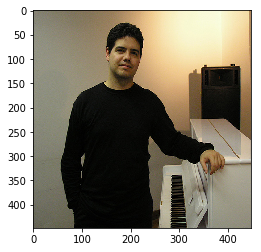

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(np.transpose(image[0],(1,2,0)))

    # label tensor slice
    objness_label = target[:, :, :, 0]
    class_label = target[:, :, :, 1]
    x_offset_label = target[:, :, :, 2]
    y_offset_label = target[:, :, :, 3]
    width_ratio_label = target[:, :, :, 4]
    height_ratio_label = target[:, :, :, 5]

In [14]:
x = lable[0,:,:,2] * size[0][0] #x 38.2143 7.6429
y = lable[0,:,:,3] * size[0][1] #y 45.0924 0.1004
w = lable[0,:,:,4] * size[0][0] #w 381 0.7620
h = lable[0,:,:,5] * size[0][1] #h 422 0.9420

200 449

In [24]:
size

tensor([[ 500.,  449.]])

In [ ]:
x = 42
y = 30
w = 128
h = 367

In [ ]:
src = np.transpose(image[0],(1,2,0))

In [ ]:
import cv2

In [ ]:
dst = cv2.resize(src.numpy(),(375,500))
dst = cv2.rectangle(dst,(x,y),(x+w,y+h),(255,0,0),3)
plt.imshow(dst)

In [30]:
0.61 
0.562
0.572
0.877
box = [62,443,26,449]
size = [500,449]

In [31]:
dw = 1. / size[0]
dh = 1. / size[1]
# (xmin + xmax / 2)
x = (box[0] + box[1]) / 2.0
# (ymin + ymax / 2)
y = (box[2] + box[3]) / 2.0

# (xmax - xmin) = w
w = box[1] - box[0]
# (ymax - ymin) = h
h = box[3] - box[2]
x = x * dw
w = w * dw
y = y * dh
h = h * dh

In [33]:
print(x,y,w,h)
print((round(x,3), round(y,3), round(w,3), round(h,3)))

0.505 0.5289532293986636 0.762 0.9420935412026725
(0.505, 0.529, 0.762, 0.942)


In [34]:
x_ratio = 0.505
grid_x_index = int(x_ratio // (1/7))


In [35]:
grid_x_index

3

In [36]:
x_ratio // (1/7)

3.0

In [69]:
print(0.9 / (1/7))
print(int(0.9 * 7))

6.300000000000001
6


In [58]:
x_ratio

0.505

In [74]:
grid_x_index = int(x_ratio * 7)
x_offset = x_ratio - ((grid_x_index) /7)


In [71]:
grid_x_index

3

In [75]:
x_offset

0.07642857142857146

In [73]:
x_ratio

0.505